# Introduction

Financial institutions are faced with the need to assess loan takers' creditworthiness to make sure that the loan can be repaid. Thus, the principal problem in the loan market is the client's ability to repay the loan in full. Analysis of client creditworthiness is a primary solution to the loan repayment problem. The research suggets[1] that relevant information to evaluate customers' loan potential include: checking accounts, credit history records, savings or deposit accounts, loan amounts, loan terms, loan purpose, controllable income, sex, working time, guarantors, address, age, property, telephone, registration (local or foreign), education, marital status, and income level.

In this challenge, I'm going to examine the credit card fraud dataset and try to correlate the factors mentioned above to prepare data for ML prediction of payment difficulty.  

# Import of libraries

In [30]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

# Reading the dataset

In [31]:
df = pd.read_csv("C:\\Users\\Marcin\\Desktop\\fontys\\4th semester\\Individual Challenge\\challenge 2\\archive\\application_data.csv", low_memory = False)
#df_prev = pd.read_csv("C:\\Users\\Marcin\\Desktop\\fontys\\4th semester\\Individual Challenge\\challenge 2\\archive\\previous_data.csv", low_memory = False)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Dataset Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


The dataset contains 307511 entries and 122 columns, with 1 Target variable. Conveniently called TARGET.

### Dataset value types

In [5]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

### Data Requirements

Lending risks have increased in recent years especially after The Great Recession(2007-2012) and the job market has the potential(or will be) thrown into disarray due to automation and advancements in AI. At the same time, technological advancements allow companies to gather and record a vast amount of data on the customer's behavior and the risks associated with lending them money.

Loan evaluation indicators are divided into 3 categories[2]:
1. analysis of borrower's willingness to repay 
2. financial analysis of borrower's ability to repay
3. a combination of both aforementioned approaches

There are no uniform standards for loan risk assessment. However, work position, age, household registration, type of work, current work duration, personal income, and bank account indicators seem to be the most common among[2] indicators in the financial analysis of the borrower. Moreover, in order to avoid skewing of the results data should be free of duplicates(however, unlikely due to each applicant's personal status).

#### Data Collection

Data for this project, are the result of collaboration between the International Institute of Information Technology in Pune and an undisclosed financial institution. It has been first created(uploaded) in 2019 and has not been updated since.

Individual loaners and businesses are the target group.

This dataset contains 119 features, of which 19 are flag documents, 46 are information about applicants' housing, 9 features about clients' region of residence, 5 features of clients' demographic, 5 internal company statistics about the applicant, and 35 features of the financial status of the applicant. 

### Column Description

In [28]:
desc = pd.read_csv("C:\\Users\\Marcin\\Desktop\\fontys\\4th semester\\Individual Challenge\\challenge 2\\archive\\columns_description_formatted.csv",
                        low_memory = False)
#desc.drop(desc.index[desc['Table'] == 'previous_application.csv'], inplace=True)

In [29]:
desc.style

,Unnamed: 0,Table,Row,Description,Special,Type
0,1,application_data,SK_ID_CURR,ID of loan in our sample,nan,int
1,2,application_data,TARGET,1-payment diffculty/0-all other cases,nan,int
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,nan,string
3,6,application_data,CODE_GENDER,Gender of the client,nan,String
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,nan,String
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,nan,String
6,9,application_data,CNT_CHILDREN,Number of children the client has,nan,int
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,nan,float
8,11,application_data,AMT_CREDIT,Credit amount of the loan,nan,float
9,12,application_data,AMT_ANNUITY,Loan annuity,nan,float


Immidielty after examining the dataset description, it is easy to notice that the TARGET variable does not describe credit card fraud but rather clients' difficulties in repaying their loans. Making the name the name of the dataset somewhat misleading. However, the purpose of the challenge still stands ie. the prediction of whether the given client will have difficulties in repaying their loan.

Column description reveals that some parts of the dataset, bear no explanation of what they exactly are. Ex. FLAG_DOCUMENT columns represent documents that customers(taking loan) has supplied to the leasor. However, this documents are labed only with numbers, thus providing no additional value I've decided to drop them from the dataset.  

### Removal of the FLAG_DOCUMENT columns

In [7]:
for name, values in df.iteritems():
    if(name.__contains__("FLAG_DOCUMENT")) == True:
        df.drop([name], axis=1, inplace=True)

In similar fashion columns providing data on applicants' housing do not provide any explanation. It is arbitrary normalized float value, that has on explanation and brings no value to the prediction(unknown data).

### Removal of the housing data

In [8]:
for name, values in df.iteritems():
    if(name.__contains__("_AVG")) == True:
        df.drop([name], axis=1, inplace=True)
    elif (name.__contains__("_MODE")) == True:
        df.drop([name], axis=1, inplace=True)
    elif (name.__contains__("_MEDI") == True):
        df.drop([name], axis=1, inplace=True)

### Null values in dataset

In [9]:
print("Total number of null values in dataset: " + str(df.isnull().values.sum()))

Total number of null values in dataset: 789106


In [10]:
null = df.isnull().sum() / len(df) * 100 
na_df = null.drop(null[null == 0].index).sort_values(ascending=False).head(20)
print(na_df)

OWN_CAR_AGE                   65.990810
EXT_SOURCE_1                  56.381073
OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64


Display of missing values per column. All columns that have more than 55% of missing values will be dropped, to avoid skewing of the results.

In [11]:
df.drop('OWN_CAR_AGE',axis=1, inplace=True)
df.drop('EXT_SOURCE_1',axis=1, inplace=True)

### Duplicated values in dataset

In [12]:
print("Number of duplicated values in the dataset is: " + str(df.duplicated(subset= None, keep='first').sum()))

Number of duplicated values in the dataset is: 0


# Feature distribution

## General distribution

### Target variable distribution

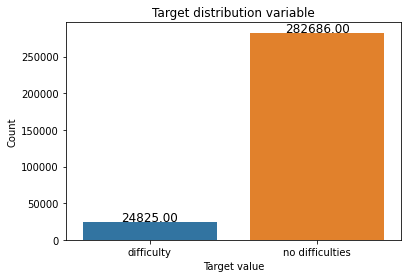

In [13]:
fig = plt.figure()
values = ['difficulty', 'no difficulties']
persons = [df['TARGET'].value_counts()[1],df['TARGET'].value_counts()[0]]
plots = sns.barplot(x = values, y = persons)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 4),
                   textcoords='offset points')
plt.title("Target distribution variable")
plt.xlabel("Target value")
plt.ylabel("Count")
plt.show()

In [14]:
non_paying = df['TARGET'].sum()/len(df)*100
print("Clients that have difficulty in paying thier loans: " + str(non_paying) + "%")
print("Clients that do not have difficulty paying thier loans " + str(100 - non_paying) + "%")

Clients that have difficulty in paying thier loans: 8.072881945686495%
Clients that do not have difficulty paying thier loans 91.92711805431351%


By examing the graph we can see that majority of the samples have no difficulty in paying their loans and only minority of samples have problems in doing so. Meaning that this dataset is imbalanced.

### Loan type distribution

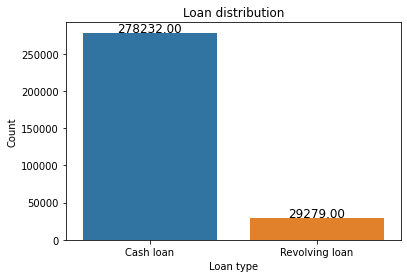

In [15]:
fig = plt.figure()
values = ['Cash loan', 'Revolving loan']
persons = [df['NAME_CONTRACT_TYPE'].value_counts()['Cash loans'],df['NAME_CONTRACT_TYPE'].value_counts()['Revolving loans']]
plots = sns.barplot(x = values, y = persons)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 4),
                   textcoords='offset points')
plt.title("Loan distribution")
plt.xlabel("Loan type")
plt.ylabel("Count")
plt.show()

As shown most of the loans taken were cash loans.

### Gender distribution

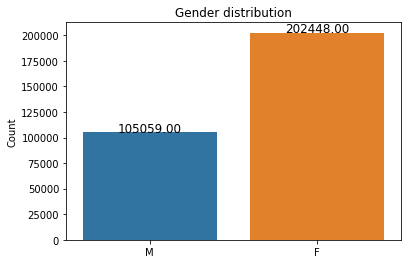

In [16]:
fig = plt.figure()
values = ['M', 'F']
persons = [df['CODE_GENDER'].value_counts()['M'],df['CODE_GENDER'].value_counts()['F']]
plots = sns.barplot(x = values, y = persons)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 4),
                   textcoords='offset points')
plt.title("Gender distribution")
plt.ylabel("Count")
plt.show()

By analyzing the graph, we can see that women are more likely(almost 50% more) to take a loan than men.

### Age distribution

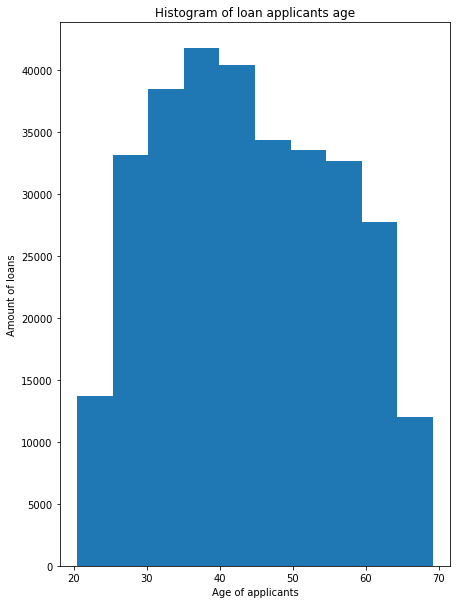

In [17]:
# abs to convert negative values to positive, without values are represented from -70 to -20 making the graph look wierd.
plt.figure(figsize=(7,10))
plt.hist(x=abs(df["DAYS_BIRTH"]/365))
plt.xlabel("Age of applicants")
plt.ylabel("Amount of loans")
plt.title("Histogram of loan applicants age")
plt.show()

Age distibution is balanced and majority of loan takers are between 30-60 years old. 

## Analysis of customers with payment difficulty vs without one

#### Functions to display graphs

In [36]:
# Function to display barplots
def barplot(data, var,label_rotation):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,10))
    s1=sns.barplot(ax=ax1,x=df[df.TARGET == 1][var].value_counts().index, data=df[df.TARGET == 1], y= 100.* df[df.TARGET == 1][var].value_counts(normalize=True))
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90,fontsize=12)
    ax1.set_title('Distribution of '+ '%s' %var +' - With payment difficulty', fontsize=15)
    ax1.set_xlabel('%s' %var,fontsize=15)
    ax1.set_ylabel("% of Loans",fontsize=15)
   
    s2=sns.barplot(ax=ax2,x=df[df.TARGET == 0][var].value_counts().index, data=df[df.TARGET == 0], y= 100.* df[df.TARGET == 0][var].value_counts(normalize=True))
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90,fontsize=12)
    ax2.set_xlabel('%s' %var, fontsize=15)
    ax2.set_ylabel("% of Loans", fontsize=15)
    ax2.set_title('Distribution of '+ '%s' %var +' - Without payment difficulty', fontsize=15)
    plt.show()

#function to display boxplots
def boxplot(var,percentile,Xlabel,Ylabel,Title):
    sns.set(style='whitegrid')
    fig, ax = plt.subplots(figsize=(7,10))
    income=sns.boxplot(x=df['TARGET'], y=df[df[var]<np.nanpercentile(df[var], 99)][var]/1000,ax=ax)
    income.set(xlabel = Xlabel, ylabel = Ylabel, title =Title)
#income.set_ylim(0,380000)

#function to display scatter plots
def scatterplot(x,y,first_graph_x,first_graph_y,first_graph_title,second_graph_x,second_graph_y,second_graph_title, outlier = 0):
    if(outlier == 0):
        fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(18,10))
        sns.scatterplot(ax=ax1, x=df[df.TARGET==1][x],y=df[df.TARGET==1][y]/1000)
        ax1.set_ylabel(first_graph_y)
        ax1.set_xlabel(first_graph_x)
        ax1.set_title(first_graph_title)
        sns.scatterplot(ax=ax2,x=df[df.TARGET==0][x],y=df[df.TARGET==0][y]/1000)
        ax2.set_title(second_graph_title)
        ax2.set_xlabel(second_graph_x)
        ax2.set_ylabel(second_graph_y)
        plt.show()
    elif(outlier < 20):
        outlier_target = df[df.CNT_CHILDREN < outlier]
        fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(18,10))
        sns.scatterplot(ax=ax1, x=outlier_target[outlier_target.TARGET==1][x],y=df[df.TARGET==1][y]/1000)
        ax1.set_ylabel(first_graph_y)
        ax1.set_xlabel(first_graph_x)
        ax1.set_title(first_graph_title)
        sns.scatterplot(ax=ax2,x=outlier_target[outlier_target.TARGET==0][x],y=df[df.TARGET==0][y]/1000)
        ax2.set_title(second_graph_title)
        ax2.set_xlabel(second_graph_x)
        ax2.set_ylabel(second_graph_y)
        plt.show()
    else:
        outlier_target = df[df.AMT_INCOME_TOTAL < outlier]
        fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(18,10))
        sns.scatterplot(ax=ax1, x=outlier_target[outlier_target.TARGET==1][x]/1000,y=df[df.TARGET==1][y]/1000)
        ax1.set_ylabel(first_graph_y)
        ax1.set_xlabel(first_graph_x)
        ax1.set_title(first_graph_title)
        sns.scatterplot(ax=ax2,x=outlier_target[outlier_target.TARGET==0][x]/1000,y=df[df.TARGET==0][y]/1000)
        ax2.set_title(second_graph_title)
        ax2.set_xlabel(second_graph_x)
        ax2.set_ylabel(second_graph_y)
        plt.show()

### Gender distribution

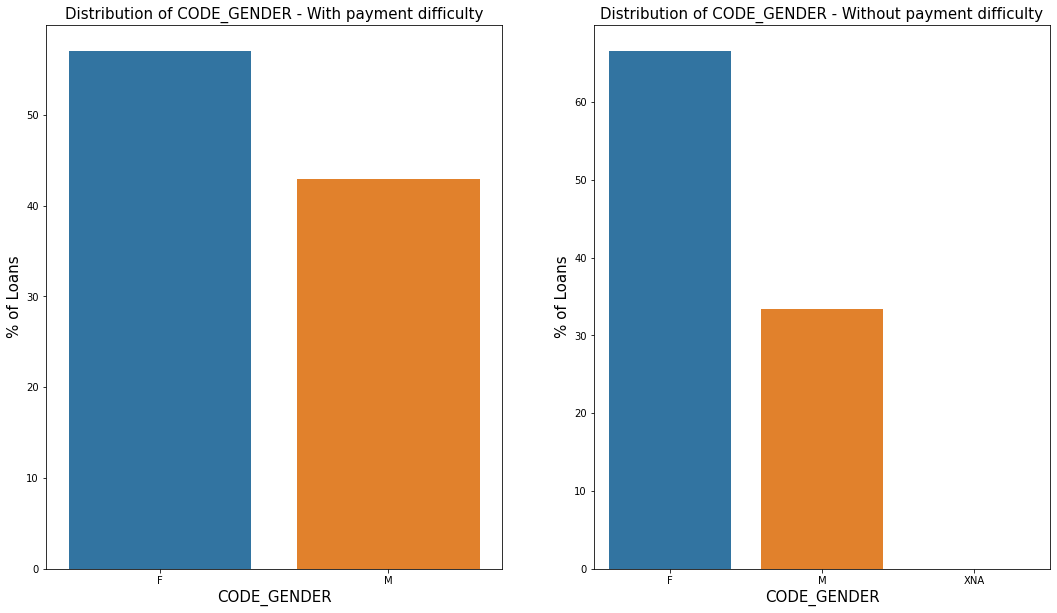

In [19]:
barplot(df,'CODE_GENDER',False)

In both cases women take more loans than men. However, man have more problems in repaying thier loans.

### Loan type distribution

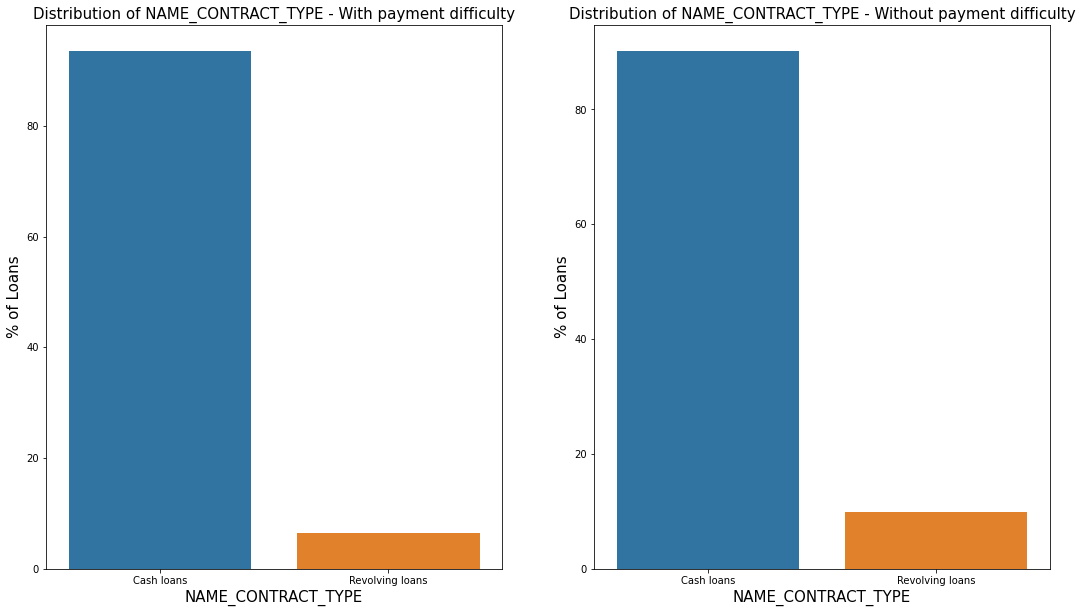

In [20]:
barplot(df,'NAME_CONTRACT_TYPE', False)

Similar to previous(general distribution) graph majority of taken loans were cash loans.

### Housing distribution

#### Housing type

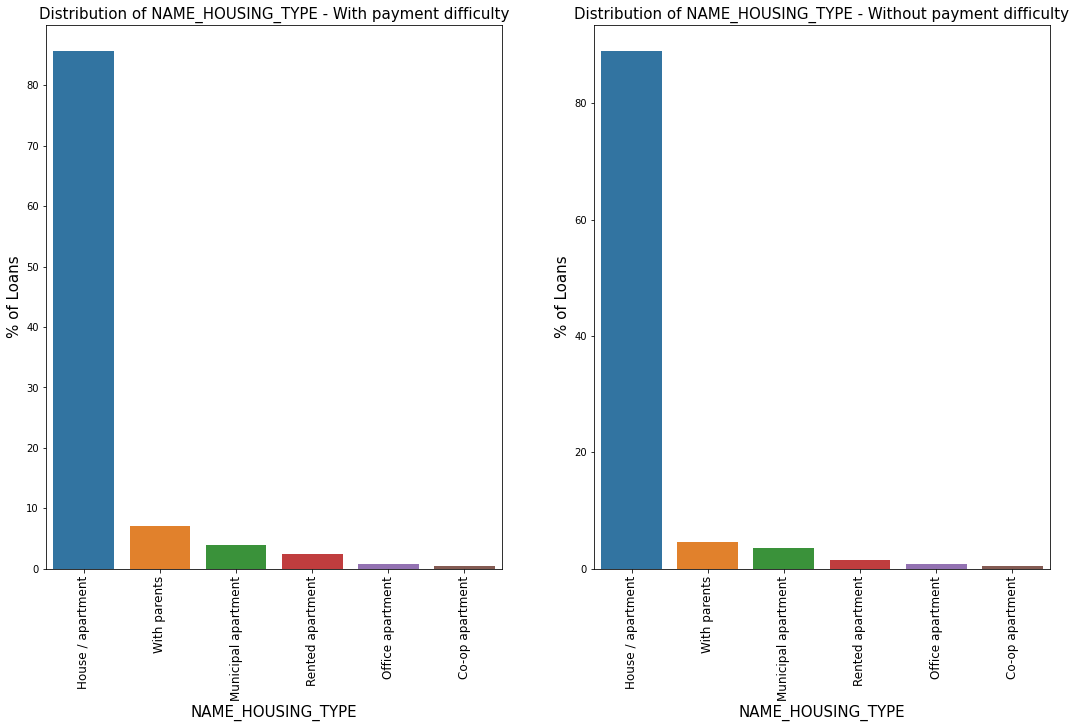

In [21]:
barplot(df,'NAME_HOUSING_TYPE',True)

Majority of people taking loans are living in their own house/apartment, however it is important to note that customers living with thier parents have higher payment difficulty.

### City rating

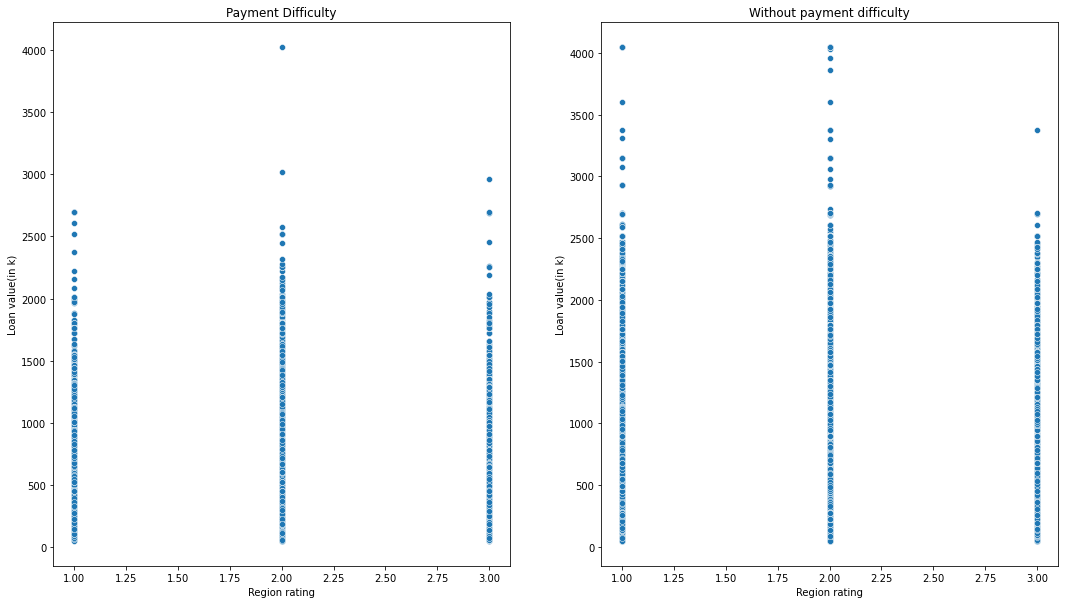

In [22]:
scatterplot('REGION_RATING_CLIENT_W_CITY','AMT_CREDIT','Region rating','Loan value(in k)','Payment Difficulty','Region rating','Loan value(in k)','Without payment difficulty')

The region where clients live seems to positive effect on their credit trustworthiness. However, due to an imbalanced dataset, this might be a misinterpretation.

### Income distribution

#### Income type

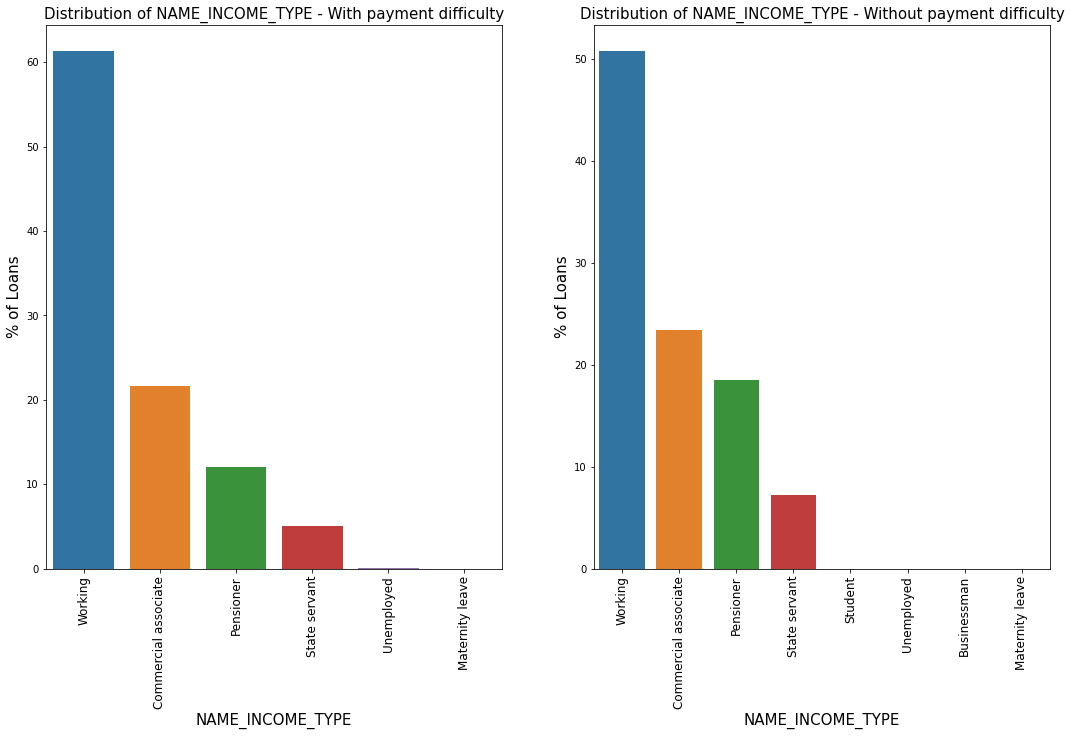

In [23]:
barplot(df, 'NAME_INCOME_TYPE', True)

Graph analysis leads to the conclusion that Pensioners, State servants, and Commercial associates are more likely not to have payment difficulties. 

#### Income bracket

Income bracket has been removed as a category. There was not credible source for this approach. Moreover, this approach is not recommended as in the process of transforming the quantitive to qualitive data we lose important information. 

In [ ]:
#Income cannot be displayed in any meaningful manner, as each sample has a different income, cluttering the graph and making it impossible to read it. To use income in the analysis, I'm going to use binning to split data into bins(categories in this example) for better visibility.

In [ ]:
df['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [4]:
1. Bracket legend:  
   # 1. 0-10% - Very low income  
    #2. 10-50% - Low income  
    #3. 50-75% - Medium income  
    #4. 76-89% - High income  
    #5. 90-100% - Very high income  

In [38]:
df['INCOME_BRACKET'] = pd.qcut(df['AMT_INCOME_TOTAL'],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], labels=['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])

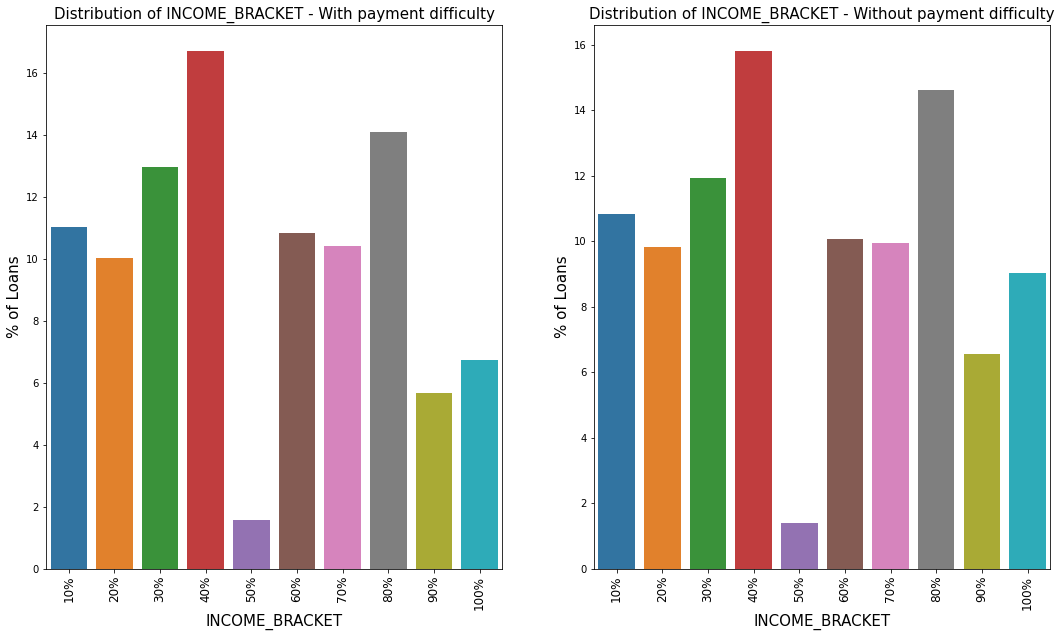

In [41]:
barplot(df,'INCOME_BRACKET',True)

General trend is that low income samples are more likely to take loans. Very low and very high income samples are least likely to take loans, however very high and high income samples are more likely to repay them on time. Curiously, 50% of income samples(average income) have the lowest rate of difficulty in paying loans. However, this might be caused by the low amount of this data samples in the dataset.

### Income analysis(searching for outliers) 

#### Scatter plot of requsted loan(value) and total income

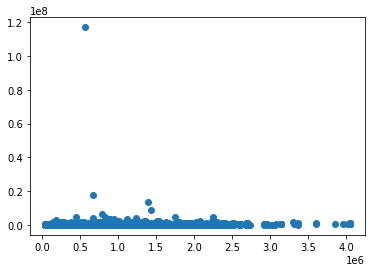

In [27]:
plt.scatter(df["AMT_CREDIT"], df["AMT_INCOME_TOTAL"]) 

There is one outlier with vastly higher income than the other samples. Moreover, the rest of the samples are so close together that they overlap, making reading the graph impossible. To make it more readable I'm going to remove the outlier by limiting the axes and lowering the ceiling.

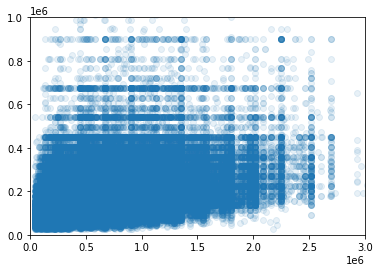

In [28]:
_, ax = plt.subplots()
ax.set_ylim((0, 1e6))
ax.set_xlim((0,3e6))
ax.scatter(df["AMT_CREDIT"], df["AMT_INCOME_TOTAL"],  alpha=0.1)

Analysis of the plot revelas that there is a correlation between the requested loan(in value) and the income of the applicant.

#### Total income of applicants(without the outlier) 

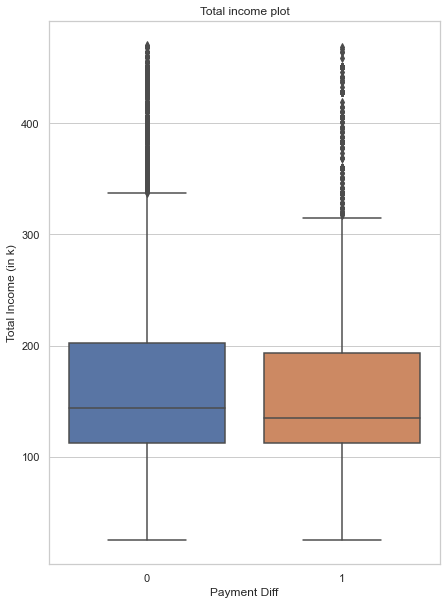

In [29]:
boxplot('AMT_INCOME_TOTAL',99,"Payment Diff","Total Income (in k)",'Total income plot')

Samples with payment diffuclties have lower income than those who can pay loans on time.

#### Loan value(amount of money borrowed)

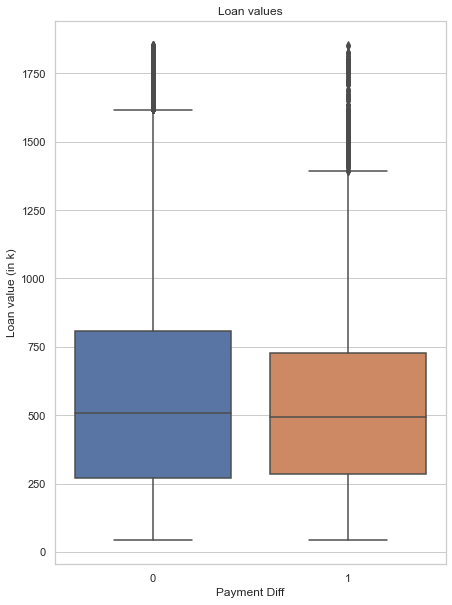

In [30]:
boxplot("AMT_CREDIT",99,"Payment Diff","Loan value (in k)",'Loan values')

The majority of samples with payment difficulty have taken loans on the lower end of the value spectrum.

#### Total income and loan received

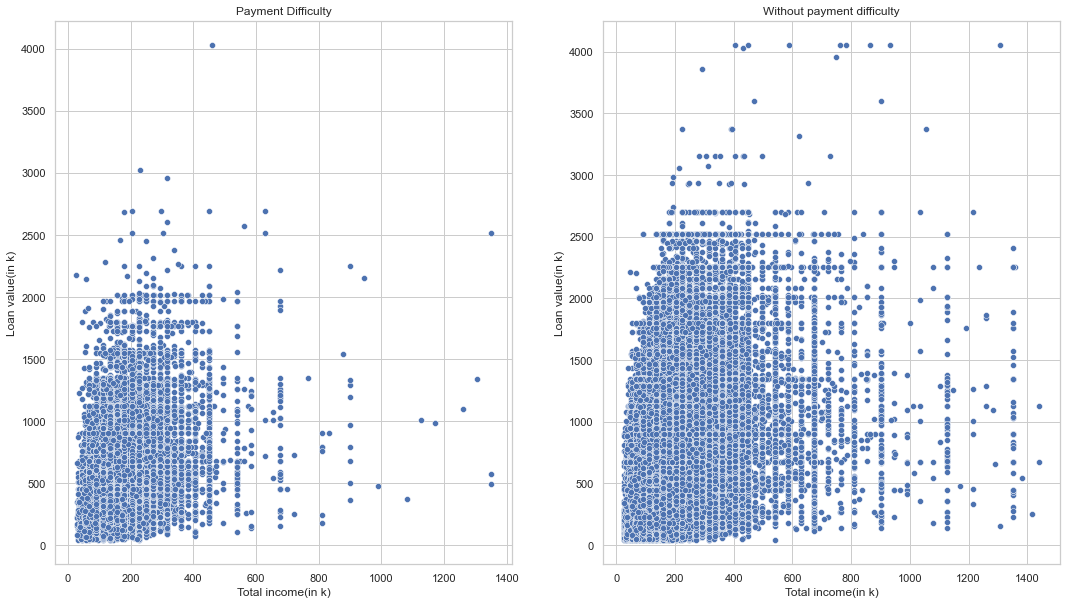

In [31]:
scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT','Total income(in k)','Loan value(in k)','Payment Difficulty','Total income(in k)','Loan value(in k)','Without payment difficulty',1500000)

Plot above shows that income has significant influence on the loan received. Higher income = greater loan capacity.

### Loan annuity  

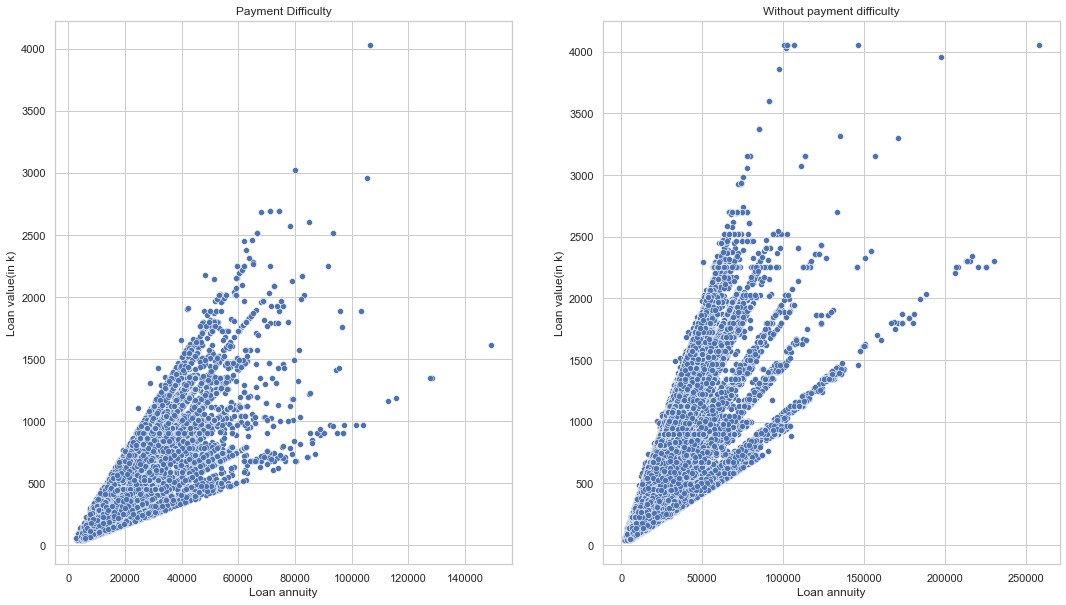

In [32]:
scatterplot('AMT_ANNUITY','AMT_CREDIT','Loan annuity','Loan value(in k)','Payment Difficulty','Loan annuity','Loan value(in k)','Without payment difficulty')

Analysis of the graph reveals that loan value increase with the loan annuity(frequency of payment dates). Ie. more frequent payments = lower risk. 

### Occupation

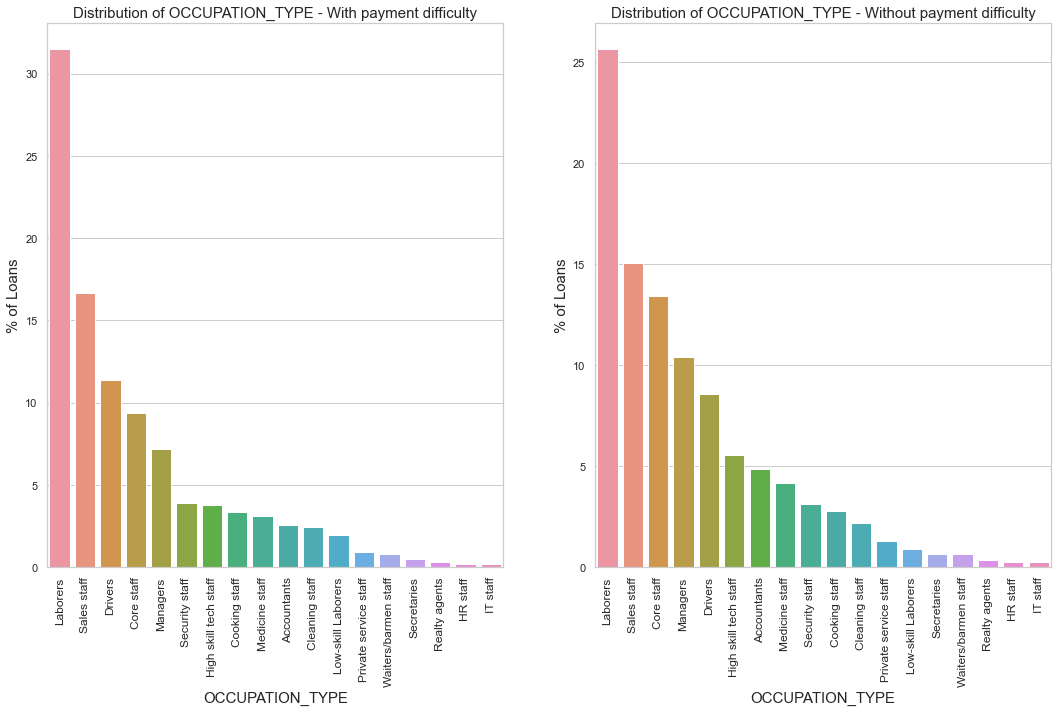

In [33]:
barplot(df,'OCCUPATION_TYPE', True)

In both cases Labores and Sales stuff are the biggest loan takers and have the biggest difficulty in paying their loans.

### Education

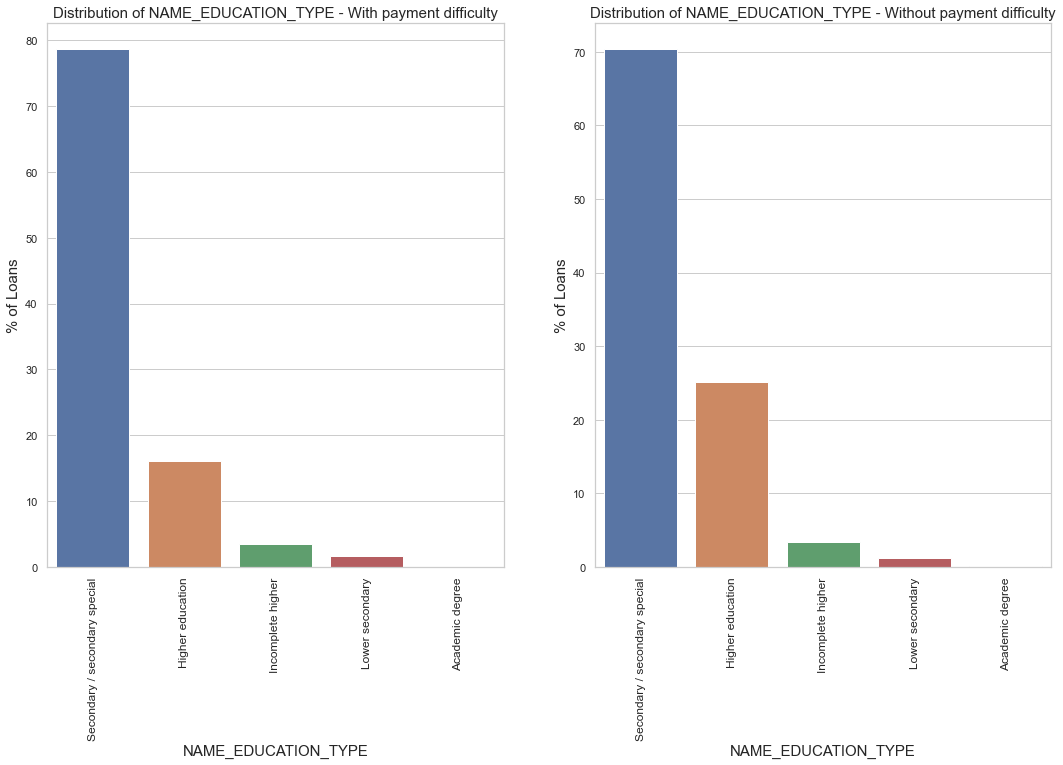

In [34]:
barplot(df, 'NAME_EDUCATION_TYPE', True)

People with higher education have lower risk of payment diffculties. Majority of loan takers have at least finished secondary education.

### Childern and family members

#### Marital status

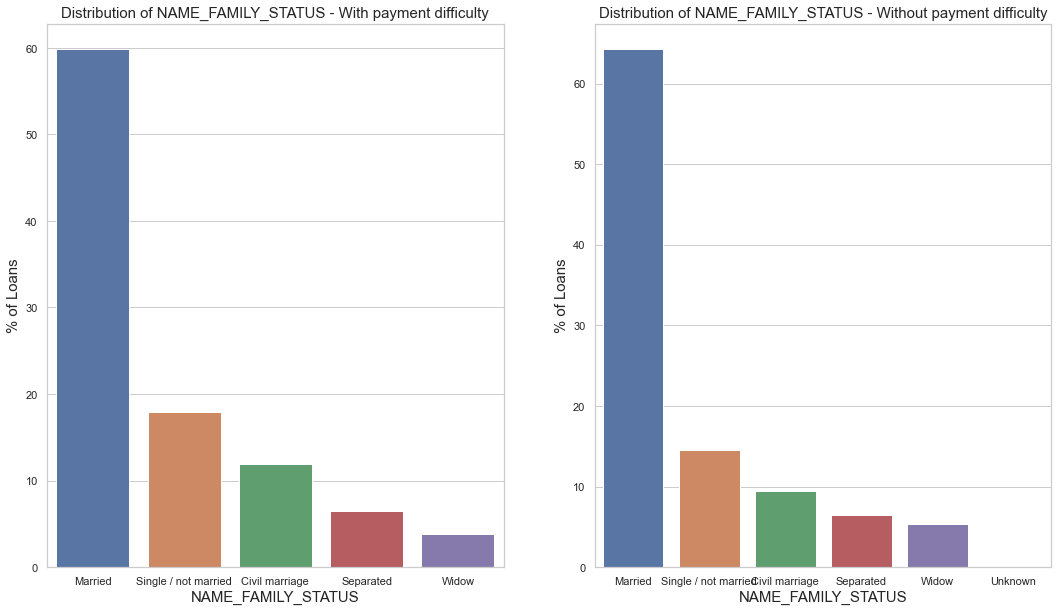

In [35]:
barplot(df,'NAME_FAMILY_STATUS', False)

Again, majority of loan takers are married in both categories. It is important to note that single people exhibit more payment diffculty. 

 ### Family members

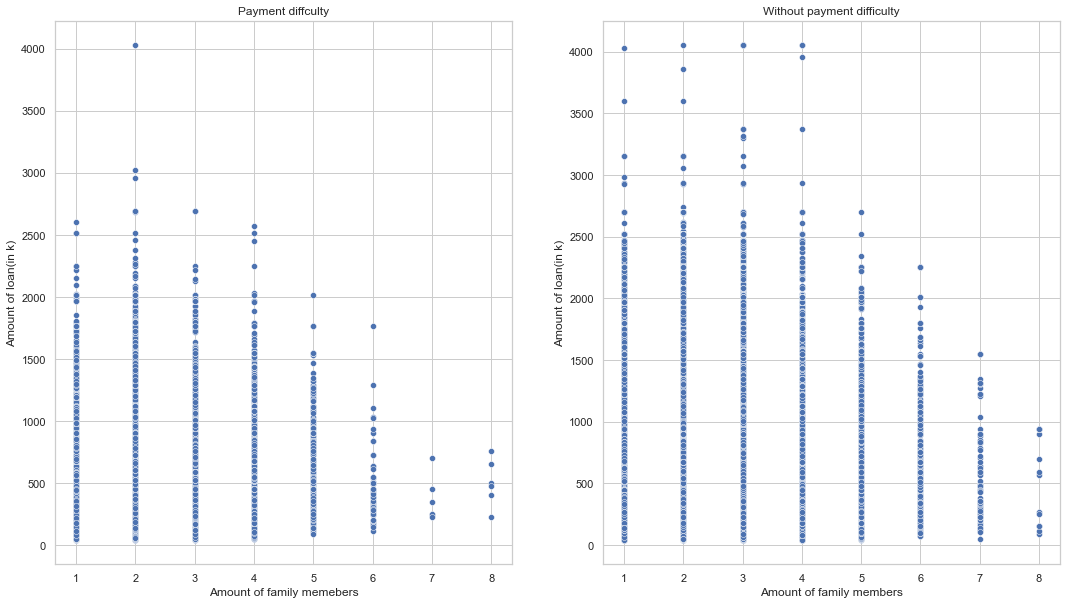

In [36]:
scatterplot('CNT_FAM_MEMBERS','AMT_CREDIT','Amount of family memebers','Amount of loan(in k)','Payment diffculty','Amount of family members','Amount of loan(in k)','Without payment difficulty',7)

With the increase of family members, loan value decreases(credit viability).

#### Amount of childern

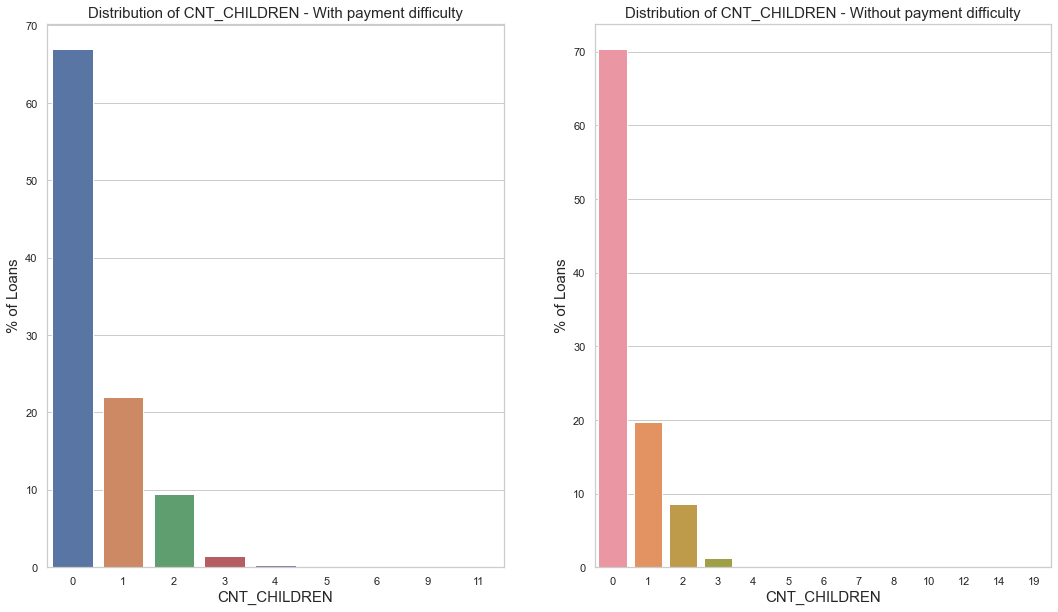

In [45]:
barplot(df,'CNT_CHILDREN',False)

Over 25% of samples with payment difficulty have 1 or more children.

#### Children and loan value received analysis

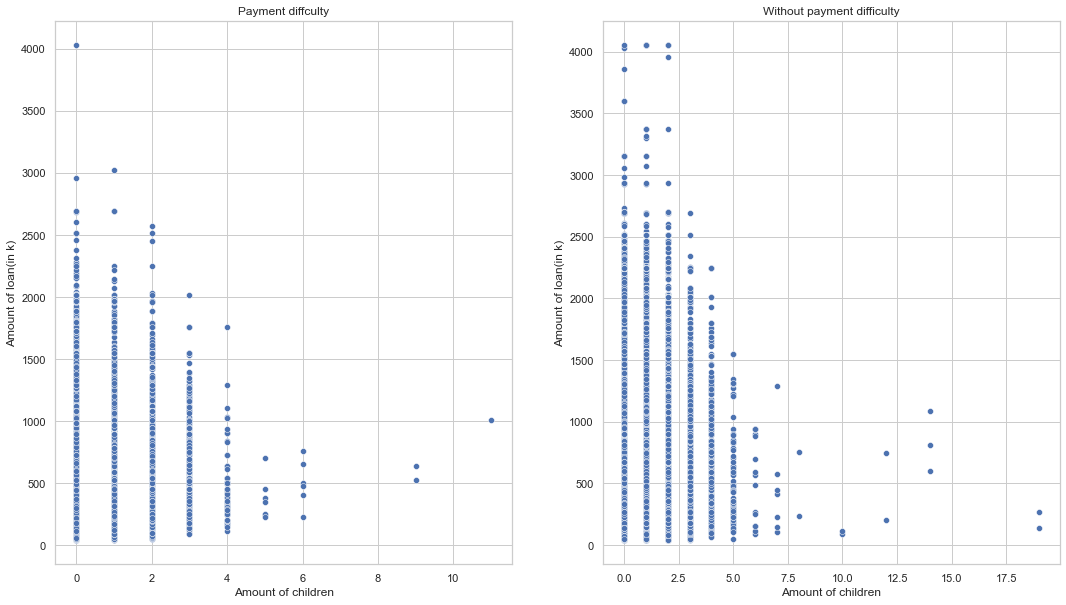

In [38]:
scatterplot('CNT_CHILDREN','AMT_CREDIT','Amount of children','Amount of loan(in k)','Payment diffculty','Amount of children','Amount of loan(in k)','Without payment difficulty')

#### Without outliers(Children and loan value)

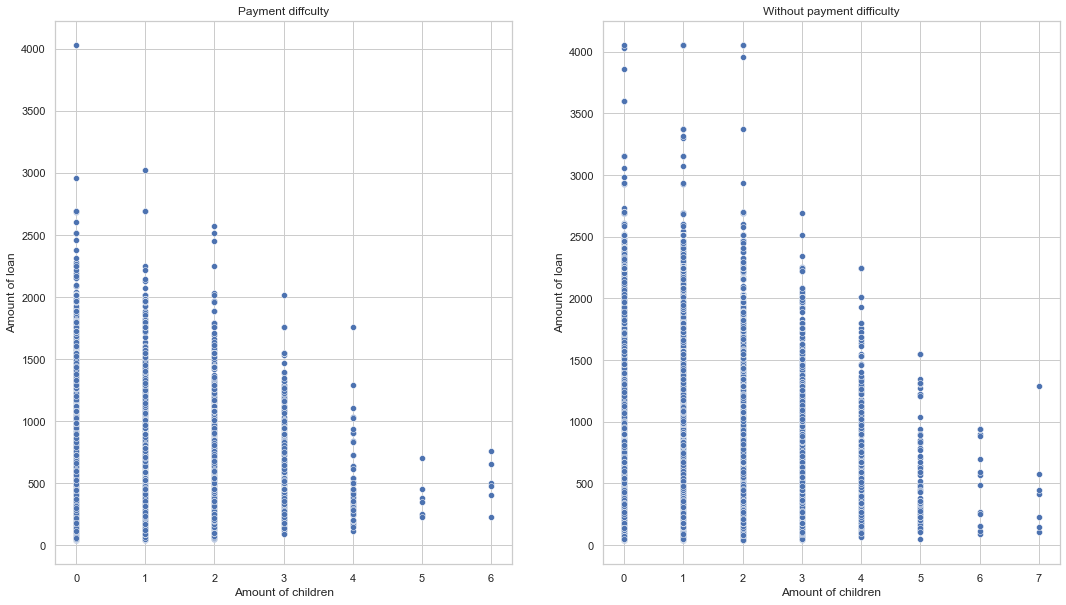

In [39]:
scatterplot('CNT_CHILDREN','AMT_CREDIT','Amount of children','Amount of loan','Payment diffculty','Amount of children','Amount of loan','Without payment difficulty',8)

Graph analysis shows that amount of children can influence the value of loans received(in a negative way).

# Correlations

Analysis performed in this notebook provides good insight into what is a good indicator of a loan payment difficulty. Based on that analysis these features have been selected for the correlation map. Without selection, heatmap would become unreadable(clutter and noise).

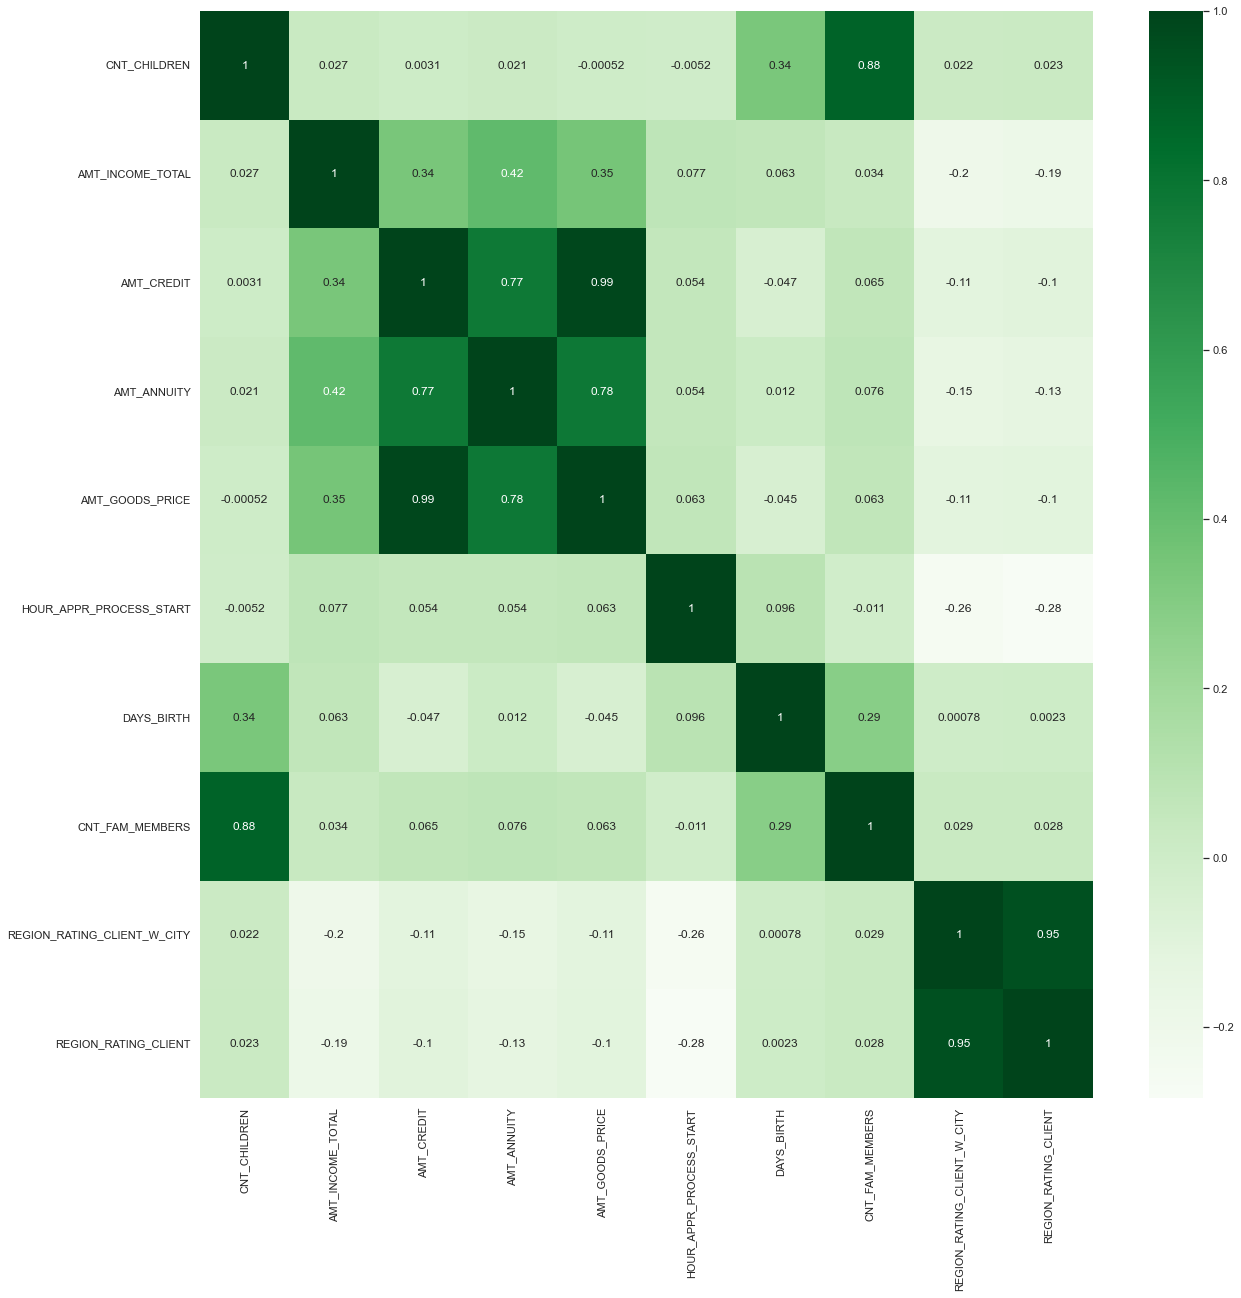

In [40]:
columns=['CNT_CHILDREN',
      'AMT_INCOME_TOTAL',
      'AMT_CREDIT',
      'AMT_ANNUITY',
      'AMT_GOODS_PRICE',
      'HOUR_APPR_PROCESS_START',
      'DAYS_BIRTH',
      'NAME_EDUCATION_TYPE',
      'CNT_FAM_MEMBERS',
      'NAME_HOUSING_TYPE',
      'REGION_RATING_CLIENT_W_CITY', 
      'REGION_RATING_CLIENT',
       'OCCUPATION_TYPE',]

diff = df[df.TARGET == 0]
selected=diff[columns]
corr=selected.corr()

plt.figure(figsize=(20,20))

# heatmap
sns.heatmap(corr, cmap="Greens", annot=True)
plt.show()

1. Positive correlations:  
    1. AMT_CREDIT- AMT_GOODS_PRICE - 0.99  
    2. REGION_RATING_CLIENT-REGION_RATING_CLIENT_W_CITY - 0.95  
    3. CNT_FAM_MEMBERS - CNT_CHILDREN - 0.88  
    4. AMT_ANNUITY - AMT_GOODS_PRICE - 0.78  
    5. AMT_ANNUITY - AMT_CREDIT - 0.77  

# Prediction

#### Selected features

In [41]:
X = df.loc[:,df.columns.isin(['AMT_CREDIT','AMT_GOODS_PRICE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','CNT_FAM_MEMBERS','CNT_CHILDREN','AMT_ANNUITY','TARGET'])]
X = X.dropna()
y=X['TARGET']

In [42]:
#Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### KNeighbour classifier

In [43]:
clf = KNeighborsClassifier(5) #classification of nearest N, sample size
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy result is: " + str(metrics.accuracy_score(y_test, y_pred))+"%")

Accuracy result is: 0.9404508096671821%


# References

1. COŞER, A., Maer-matei, M. M., & ALBU, C. (2019). PREDICTIVE MODELS FOR LOAN DEFAULT RISK ASSESSMENT. Economic Computation & Economic Cybernetics Studies & Research, 53(2).
2. Li, Y., & Chen, W. (2021). Entropy method of constructing a combined model for improving loan default prediction: A case study in China. Journal of the Operational Research Society, 72(5), 1099–1109. https://doi.org/10.1080/01605682.2019.1702905